<a href="https://colab.research.google.com/github/Aman78695/Credit_Card_Clustering/blob/main/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('/content/CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(8636, 18)

In [10]:
df=df[['BALANCE','PURCHASES','CREDIT_LIMIT']]

In [11]:
df.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0


In [19]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df['BALANCE']=scale.fit_transform(df[['BALANCE']])

<ipython-input-19-32c7b41f87db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BALANCE']=scale.fit_transform(df[['BALANCE']])


In [24]:
df.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,0.002148,0.001945,0.031720
1,0.168169,0.000000,0.232053
2,0.131026,0.015766,0.248748
4,0.042940,0.000326,0.038397
5,0.095038,0.027188,0.058431


In [21]:
df['PURCHASES']=scale.fit_transform(df[['PURCHASES']])

<ipython-input-21-aac1e6f516dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PURCHASES']=scale.fit_transform(df[['PURCHASES']])


In [23]:
df['CREDIT_LIMIT']=scale.fit_transform(df[['CREDIT_LIMIT']])

<ipython-input-23-666506709d1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CREDIT_LIMIT']=scale.fit_transform(df[['CREDIT_LIMIT']])


In [27]:
model=KMeans(n_clusters=5)

In [33]:
np.unique(model.fit_predict(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2, 3, 4], dtype=int32)

In [29]:
df['cluster']=model.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
df.head(17)

,BALANCE,PURCHASES,CREDIT_LIMIT,cluster
0,0.002148,0.001945,0.031720,0
1,0.168169,0.000000,0.232053,4
2,0.131026,0.015766,0.248748,4
4,0.042940,0.000326,0.038397,0
5,0.095038,0.027188,0.058431,0
6,0.032939,0.144598,0.449082,3
7,0.095764,0.008895,0.075125,0
8,0.053296,0.017567,0.232053,2
9,0.007994,0.026134,0.365609,3
10,0.067905,0.018763,0.038397,0


In [43]:
df0=df[df['cluster']==0]

In [44]:
df1=df[df['cluster']==1]

In [45]:
df2=df[df['cluster']==2]

In [48]:
df3=df[df['cluster']==3]

In [49]:
df4=df[df['cluster']==4]

In [38]:
df0

,BALANCE,PURCHASES,CREDIT_LIMIT,cluster
0,0.002148,0.001945,0.031720,0
4,0.042940,0.000326,0.038397,0
5,0.095038,0.027188,0.058431,0
7,0.095764,0.008895,0.075125,0
10,0.067905,0.018763,0.038397,0
...,...,...,...,...
8943,0.000308,0.000426,0.015025,0
8945,0.001496,0.005936,0.031720,0
8947,0.001229,0.002945,0.031720,0
8948,0.000707,0.000000,0.015025,0


In [39]:
import matplotlib.pyplot as plt

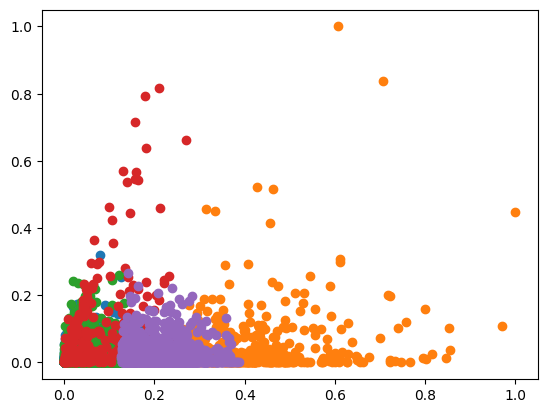

In [50]:
plt.scatter(x=df0['BALANCE'],y=df0['PURCHASES'])
plt.scatter(x=df1['BALANCE'],y=df1['PURCHASES'])
plt.scatter(x=df2['BALANCE'],y=df2['PURCHASES'])
plt.scatter(x=df3['BALANCE'],y=df3['PURCHASES'])
plt.scatter(x=df4['BALANCE'],y=df4['PURCHASES'])

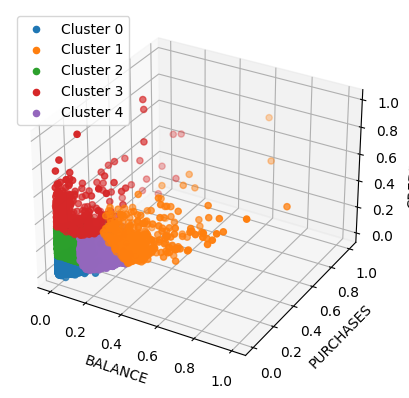

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plots for each cluster
ax.scatter(df0['BALANCE'], df0['PURCHASES'], df0['CREDIT_LIMIT'], label='Cluster 0')
ax.scatter(df1['BALANCE'], df1['PURCHASES'], df1['CREDIT_LIMIT'], label='Cluster 1')
ax.scatter(df2['BALANCE'], df2['PURCHASES'], df2['CREDIT_LIMIT'], label='Cluster 2')
ax.scatter(df3['BALANCE'], df3['PURCHASES'], df3['CREDIT_LIMIT'], label='Cluster 3')
ax.scatter(df4['BALANCE'], df4['PURCHASES'], df4['CREDIT_LIMIT'], label='Cluster 4')

# Set labels for each axis
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDIT_LIMIT')

# Add a legend
ax.legend()

# Show the 3D scatter plot
plt.show()


In [52]:
!pip install plotly


In [53]:
import plotly.express as px

# Create a DataFrame for each cluster
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

# Create a scatter plot for each cluster
fig = px.scatter_3d(df0, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', title='Cluster 0')
fig.add_trace(px.scatter_3d(df1, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', title='Cluster 1').data[0])
fig.add_trace(px.scatter_3d(df2, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', title='Cluster 2').data[0])

# Show the interactive plot
fig.show()
